# animation example code: histogram.py

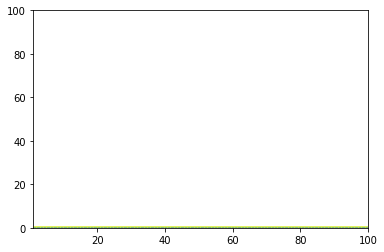

In [23]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from matplotlib import rc

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.arange(1, 101)
np.random.shuffle(data)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(0, 100)


def animate(i):
    # simulate new data coming in
    data = np.arange(1, 101)
    np.random.shuffle(data)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

anim = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)


In [24]:
anim._repr_html_() is None
rc('animation', html='jshtml')

In [25]:
anim